## Processamento de Linguagem natural - parte2:

- Modificar os stop words (acrescendo outras palavras e simbolos)

- Evitar variações de palavras (como de gênero e número)

- TF- IDF (term frequency-inverse document frequency)= forma de representar texto, atribuindo peso às palavras mais importantes

- Ngrams

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import nltk 
from nltk import tokenize

from string import punctuation

In [2]:
resenha = pd.read_csv('dados/imdb-reviews-pt-br.csv')
classificacao = resenha['sentiment'].replace(['neg','pos'],[0,1])
resenha['classificacao'] = classificacao

In [3]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              texto[coluna_classificacao],
                                                              random_state = 42)
    regressao_logistica = LogisticRegression(solver = "lbfgs")
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)

def nuvem_palavras_neg(texto, coluna_texto):
    texto_negativo = texto.query("sentiment=='neg'")
    todas_palavras = ' '.join(texto for texto in texto_negativo[coluna_texto])
    
    nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110,
                              collocations=False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
def nuvem_palavras_pos(texto, coluna_texto):
    texto_positivo = texto.query("sentiment=='pos'")
    todas_palavras = ' '.join(texto for texto in texto_positivo[coluna_texto])
    
    nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110,
                              collocations=False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis("off")
    plt.show()

def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([resenha for resenha in texto[coluna_texto]])
    token_espaco = nltk.tokenize.WhitespaceTokenizer()
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencias = nltk.FreqDist(token_frase)
    df_frequencias = pd.DataFrame({'Palavras': list(frequencias.keys()),
                               'Frequencia': list(frequencias.values())})
    df_frequencias = df_frequencias.nlargest(n=quantidade, columns='Frequencia')

    total = df_frequencias['Frequencia'].sum()
    df_frequencias['Porcentagem'] = df_frequencias['Frequencia'].cumsum() / total * 100

    plt.figure(figsize=(12,8))
    ax = sns.barplot(data=df_frequencias, x='Palavras', y='Frequencia', color='gray')
    ax2 = ax.twinx()
    sns.lineplot(data=df_frequencias, x='Palavras', y='Porcentagem', color='red', sort=False, ax=ax2)
    plt.show()

In [4]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")
token_espaco = tokenize.WhitespaceTokenizer()
frase_processada = list()

for opiniao in resenha.text_pt:
    nova_frase = list()
    palavra_texto = token_espaco.tokenize(opiniao)
    for palavra in palavra_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha['tratamento_1'] = frase_processada

## WordPunctTokenizer

Somos capazes de extrair tokens de string de palavras ou sentenças na forma de caracteres Alpabéticos e não alphabéticos. 

'we are able to extract the tokens from string of words or sentences in the form of Alphabetic and Non-Alphabetic character by using `tokenize.WordPunctTokenizer()` method.'

https://www.geeksforgeeks.org/python-nltk-tokenize-wordpuncttokenizer/

In [5]:
frase = "Olá..%46 *$# mundo!"
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)
print(token_frase)

['Olá', '..%', '46', '*$#', 'mundo', '!']


In [6]:
from string import punctuation

In [7]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
pontuacao = list()

for caractere in punctuation:
    pontuacao.append(caractere)

In [9]:
pontuacao

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [10]:
pontuacao = list()

for caractere in punctuation:
    pontuacao.append(caractere)
    
pontuacao_stopwords = pontuacao + palavras_irrelevantes

frase_processada = list()
for opiniao in resenha['tratamento_1']:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavras in palavras_texto:
        if palavras not in pontuacao_stopwords:
            nova_frase.append(palavras)
    frase_processada.append(' '.join(nova_frase))
    
    
resenha['tratamento_2'] = frase_processada

In [11]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...


### Comparando a resenha_1 com resenha_2:

In [12]:
resenha['tratamento_1'][0]

'Mais vez, Sr. Costner arrumou filme tempo necessário. Além terríveis seqüências resgate mar, quais poucas, simplesmente importei nenhum personagens. A maioria fantasmas armário, personagem Costers realizado logo início, esquecido tarde, importava. O personagem deveríamos importar arrogante superconfiante, Ashton Kutcher. O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado. Seu único obstáculo parece vencendo Costner. Finalmente, bem além meio caminho, Costner conta sobre fantasmas Kutchers. Somos informados Kutcher levado melhor pressentimentos presságios anteriores. Nenhuma mágica aqui, tudo podia fazer desligar hora.'

In [13]:
resenha['tratamento_2'][0]

'Mais vez Sr Costner arrumou filme tempo necessário Além terríveis seqüências resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armário personagem Costers realizado logo início esquecido tarde importava O personagem deveríamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado Seu único obstáculo parece vencendo Costner Finalmente bem além meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado melhor pressentimentos presságios anteriores Nenhuma mágica aqui tudo podia fazer desligar hora'

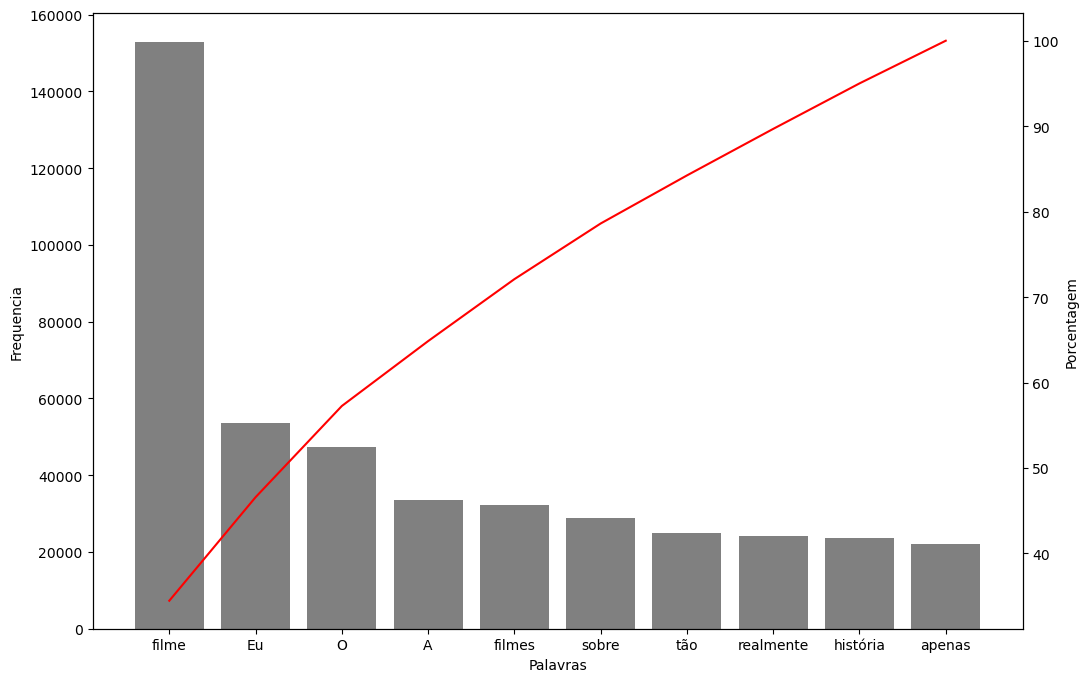

In [14]:
pareto(resenha,'tratamento_2',10)

É necessário retirar a pontuação, pois mesmo usando o CountVectorizer para realizar a representação em Bag of Words, nós criamos a função pareto, que por sua vez não remove a pontuação automaticamente. Portanto, para que o pareto represente a frequência das palavras, o mais próximo possível da frequência da representação Bag of W\ords é importante remover as pontuações do nosso corpus.

### Palavras com acento:



In [15]:
import unidecode

In [16]:
frase_com_acentos = "ótimo péssimo não tão "

teste = unidecode.unidecode(frase_com_acentos)
print(teste)

otimo pessimo nao tao 


In [17]:
sem_acentos = [unidecode.unidecode(texto) for texto in resenha["tratamento_2"]]

In [18]:
sem_acentos[0]

'Mais vez Sr Costner arrumou filme tempo necessario Alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armario personagem Costers realizado logo inicio esquecido tarde importava O personagem deveriamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado Seu unico obstaculo parece vencendo Costner Finalmente bem alem meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado melhor pressentimentos pressagios anteriores Nenhuma magica aqui tudo podia fazer desligar hora'

In [19]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

In [20]:
stopwords_sem_acento

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 'a',
 'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'as',
 'ate',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'eramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'esta',
 'estamos',
 'estao',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estavamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiveramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivessemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'foramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fossemos',
 'fui',
 'ha',
 'haja